## Import Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Load Datasets

In [2]:
data = pd.read_csv('data/big-five-personality-clean.csv')
data

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,...,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,...,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,...,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,...,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,...,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,...,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874361,4.0,2.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,...,2.0,4.0,3.0,4.0,2.0,4.0,2.0,2.0,4.0,US
874362,4.0,3.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,3.0,...,1.0,5.0,1.0,5.0,1.0,3.0,4.0,5.0,4.0,US
874363,4.0,2.0,4.0,3.0,5.0,1.0,4.0,2.0,4.0,4.0,...,1.0,5.0,1.0,4.0,1.0,5.0,5.0,4.0,5.0,US
874364,2.0,4.0,3.0,4.0,2.0,2.0,1.0,4.0,2.0,4.0,...,2.0,4.0,2.0,3.0,2.0,4.0,5.0,5.0,3.0,US


## Preprocessing

### Null Value Checking

In [3]:
print('Is there any missing value? ', data.isnull().values.any())
print('How many missing values? ', data.isnull().values.sum())
data.dropna(inplace=True)
print('Number of participants after eliminating missing values: ', len(data))

Is there any missing value?  False
How many missing values?  0
Number of participants after eliminating missing values:  874366


### Grouping Question

In [5]:
ext_questions = {'EXT1' : 'I am the life of the party',
                 'EXT2' : 'I dont talk a lot',
                 'EXT3' : 'I feel comfortable around people',
                 'EXT4' : 'I keep in the background',
                 'EXT5' : 'I start conversations',
                 'EXT6' : 'I have little to say',
                 'EXT7' : 'I talk to a lot of different people at parties',
                 'EXT8' : 'I dont like to draw attention to myself',
                 'EXT9' : 'I dont mind being the center of attention',
                 'EXT10': 'I am quiet around strangers'}

est_questions = {'EST1' : 'I get stressed out easily',
                 'EST2' : 'I am relaxed most of the time',
                 'EST3' : 'I worry about things',
                 'EST4' : 'I seldom feel blue',
                 'EST5' : 'I am easily disturbed',
                 'EST6' : 'I get upset easily',
                 'EST7' : 'I change my mood a lot',
                 'EST8' : 'I have frequent mood swings',
                 'EST9' : 'I get irritated easily',
                 'EST10': 'I often feel blue'}

agr_questions = {'AGR1' : 'I feel little concern for others',
                 'AGR2' : 'I am interested in people',
                 'AGR3' : 'I insult people',
                 'AGR4' : 'I sympathize with others feelings',
                 'AGR5' : 'I am not interested in other peoples problems',
                 'AGR6' : 'I have a soft heart',
                 'AGR7' : 'I am not really interested in others',
                 'AGR8' : 'I take time out for others',
                 'AGR9' : 'I feel others emotions',
                 'AGR10': 'I make people feel at ease'}

csn_questions = {'CSN1' : 'I am always prepared',
                 'CSN2' : 'I leave my belongings around',
                 'CSN3' : 'I pay attention to details',
                 'CSN4' : 'I make a mess of things',
                 'CSN5' : 'I get chores done right away',
                 'CSN6' : 'I often forget to put things back in their proper place',
                 'CSN7' : 'I like order',
                 'CSN8' : 'I shirk my duties',
                 'CSN9' : 'I follow a schedule',
                 'CSN10' : 'I am exacting in my work'}

opn_questions = {'OPN1' : 'I have a rich vocabulary',
                 'OPN2' : 'I have difficulty understanding abstract ideas',
                 'OPN3' : 'I have a vivid imagination',
                 'OPN4' : 'I am not interested in abstract ideas',
                 'OPN5' : 'I have excellent ideas',
                 'OPN6' : 'I do not have a good imagination',
                 'OPN7' : 'I am quick to understand things',
                 'OPN8' : 'I use difficult words',
                 'OPN9' : 'I spend time reflecting on things',
                 'OPN10': 'I am full of ideas'}


In [6]:
#Function for grouping question
def question_grouping(name, data):
    group = [column for column in data if column.startswith(name)]
    
    return group

In [7]:
# Group Names and Columns
EXT = question_grouping('EXT', data)
EST = question_grouping('EST', data)
AGR = question_grouping('AGR', data)
CSN = question_grouping('CSN', data)
OPN = question_grouping('OPN', data)

In [11]:
print(EXT)

['EXT1', 'EXT2', 'EXT3', 'EXT4', 'EXT5', 'EXT6', 'EXT7', 'EXT8', 'EXT9', 'EXT10']


In [12]:
# Defining a function to visualize the questions and answers distribution
def vis_questions(groupname, questions, color):
    plt.figure(figsize=(40,70))
    for i in range(1, 11):
        plt.subplot(10,5,i)
        plt.hist(data[groupname[i-1]], bins=10, color= color, alpha=.5)
        plt.title(questions[groupname[i-1]], fontsize=18)

Q&As Related to Extroversion Personality


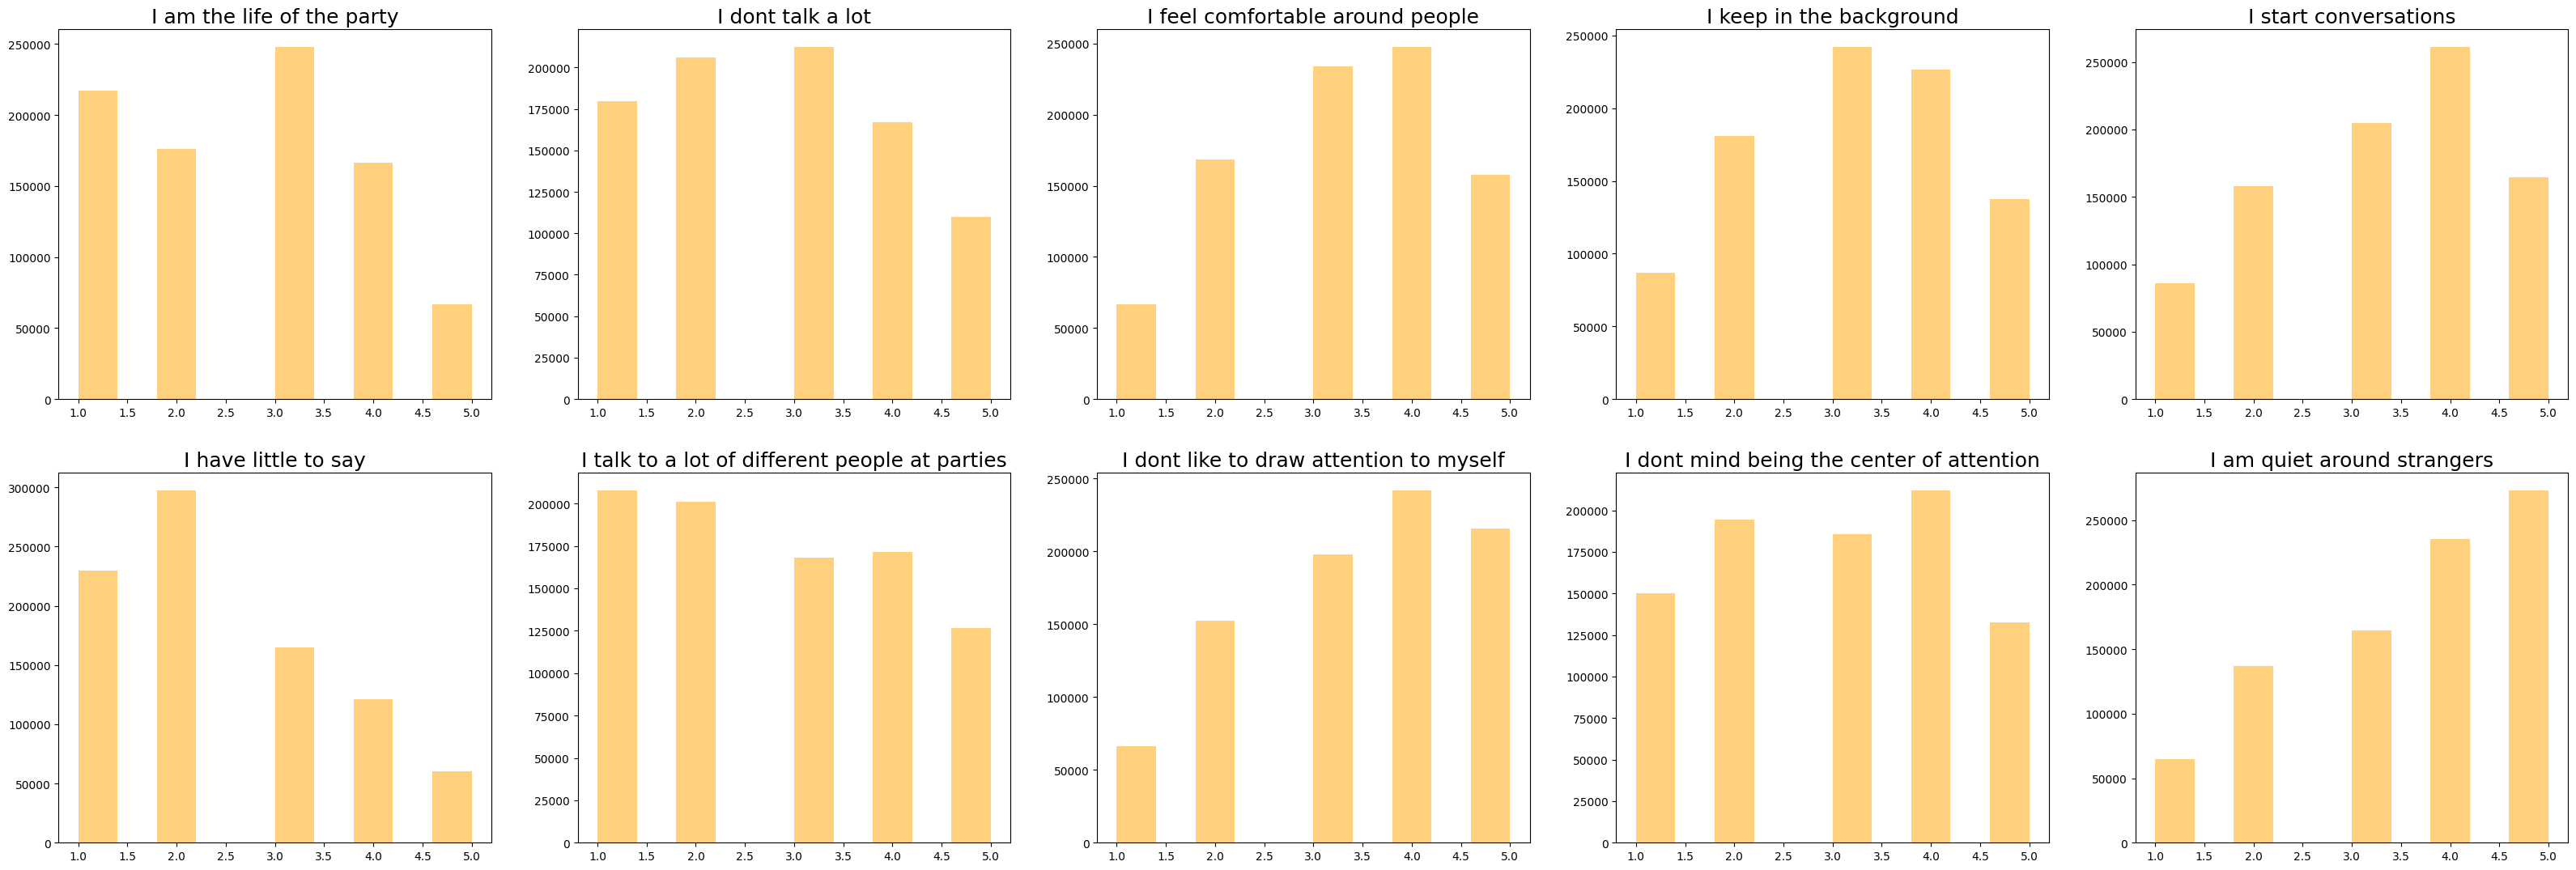

In [13]:
print('Q&As Related to Extroversion Personality')
vis_questions(EXT, ext_questions, 'orange')

Q&As Related to Neuroticism Personality


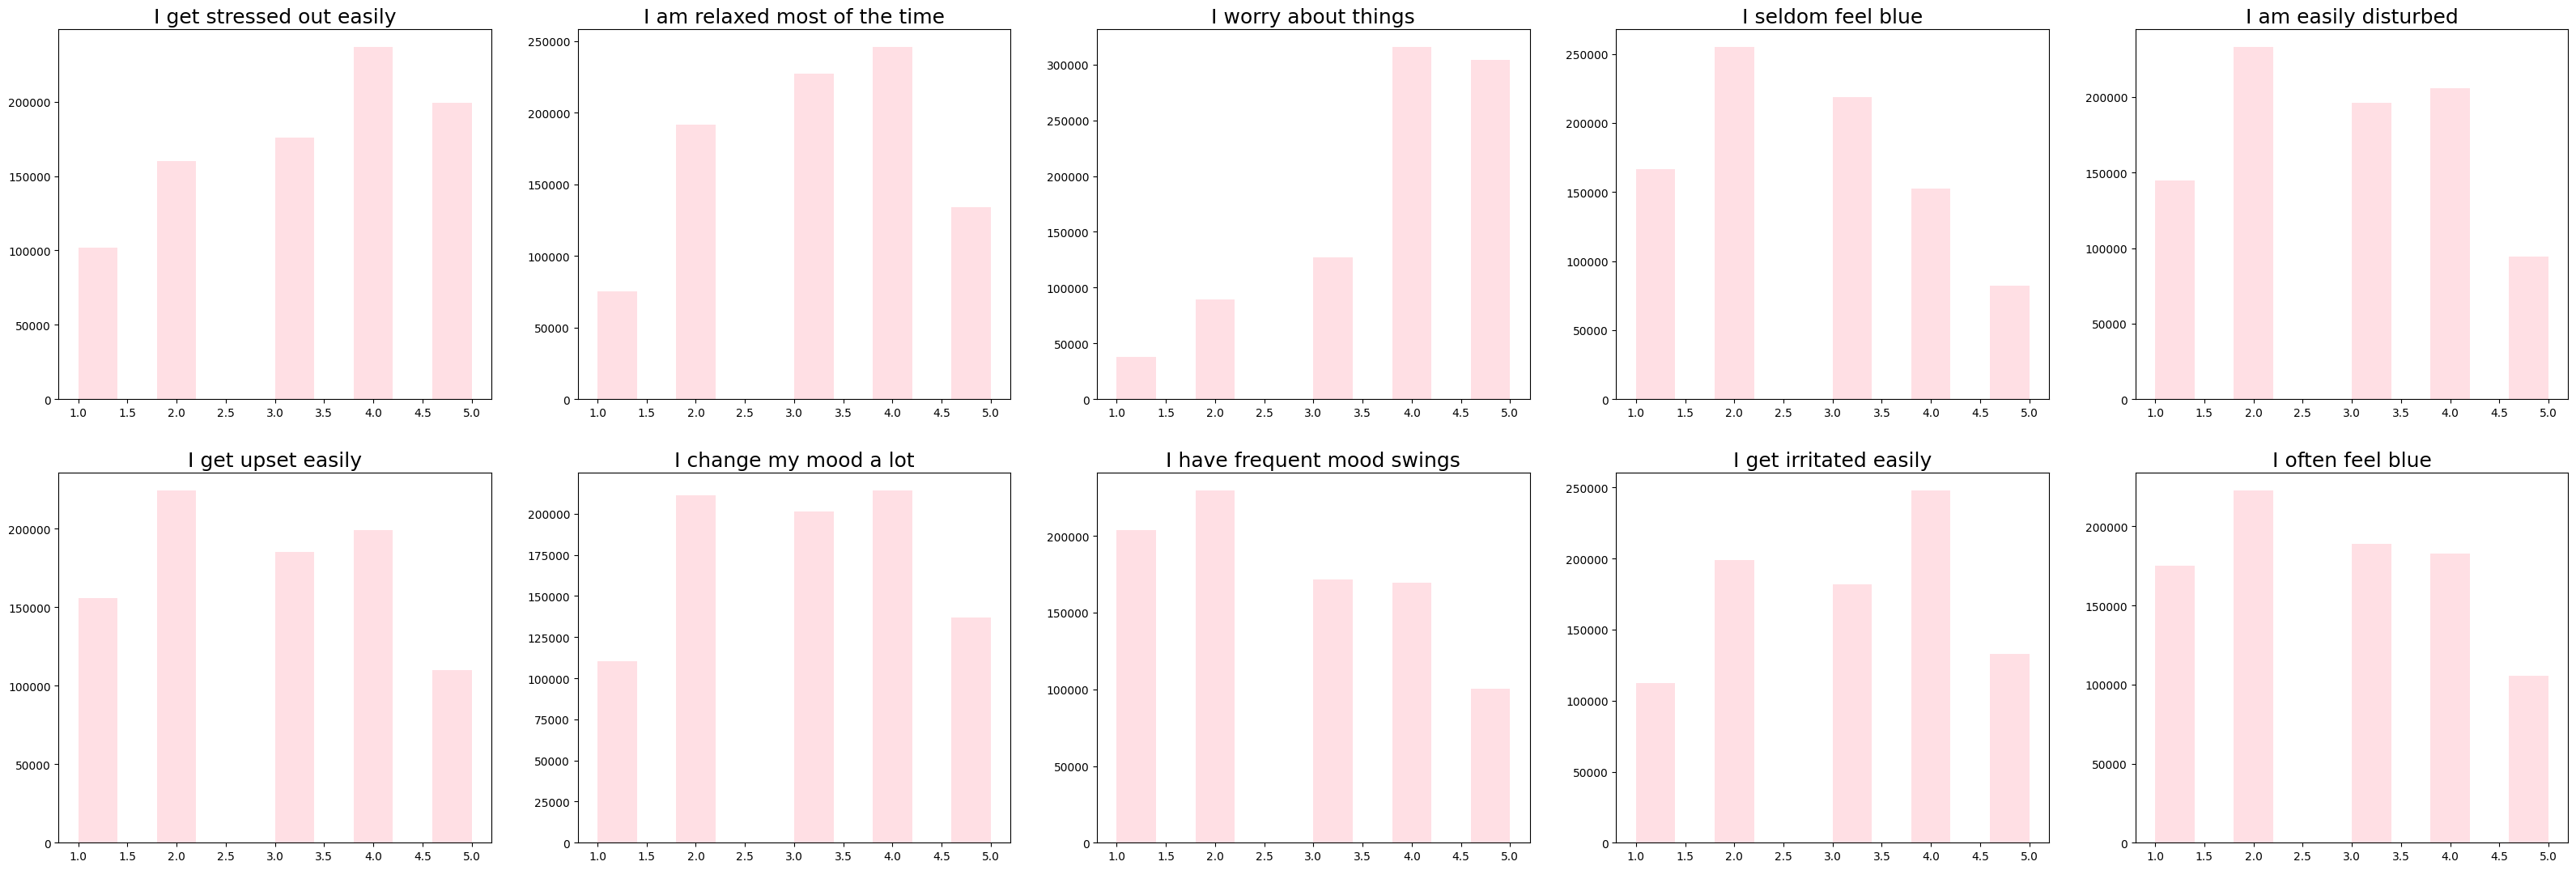

In [14]:
print('Q&As Related to Neuroticism Personality')
vis_questions(EST, est_questions, 'pink')

Q&As Related to Agreeable Personality


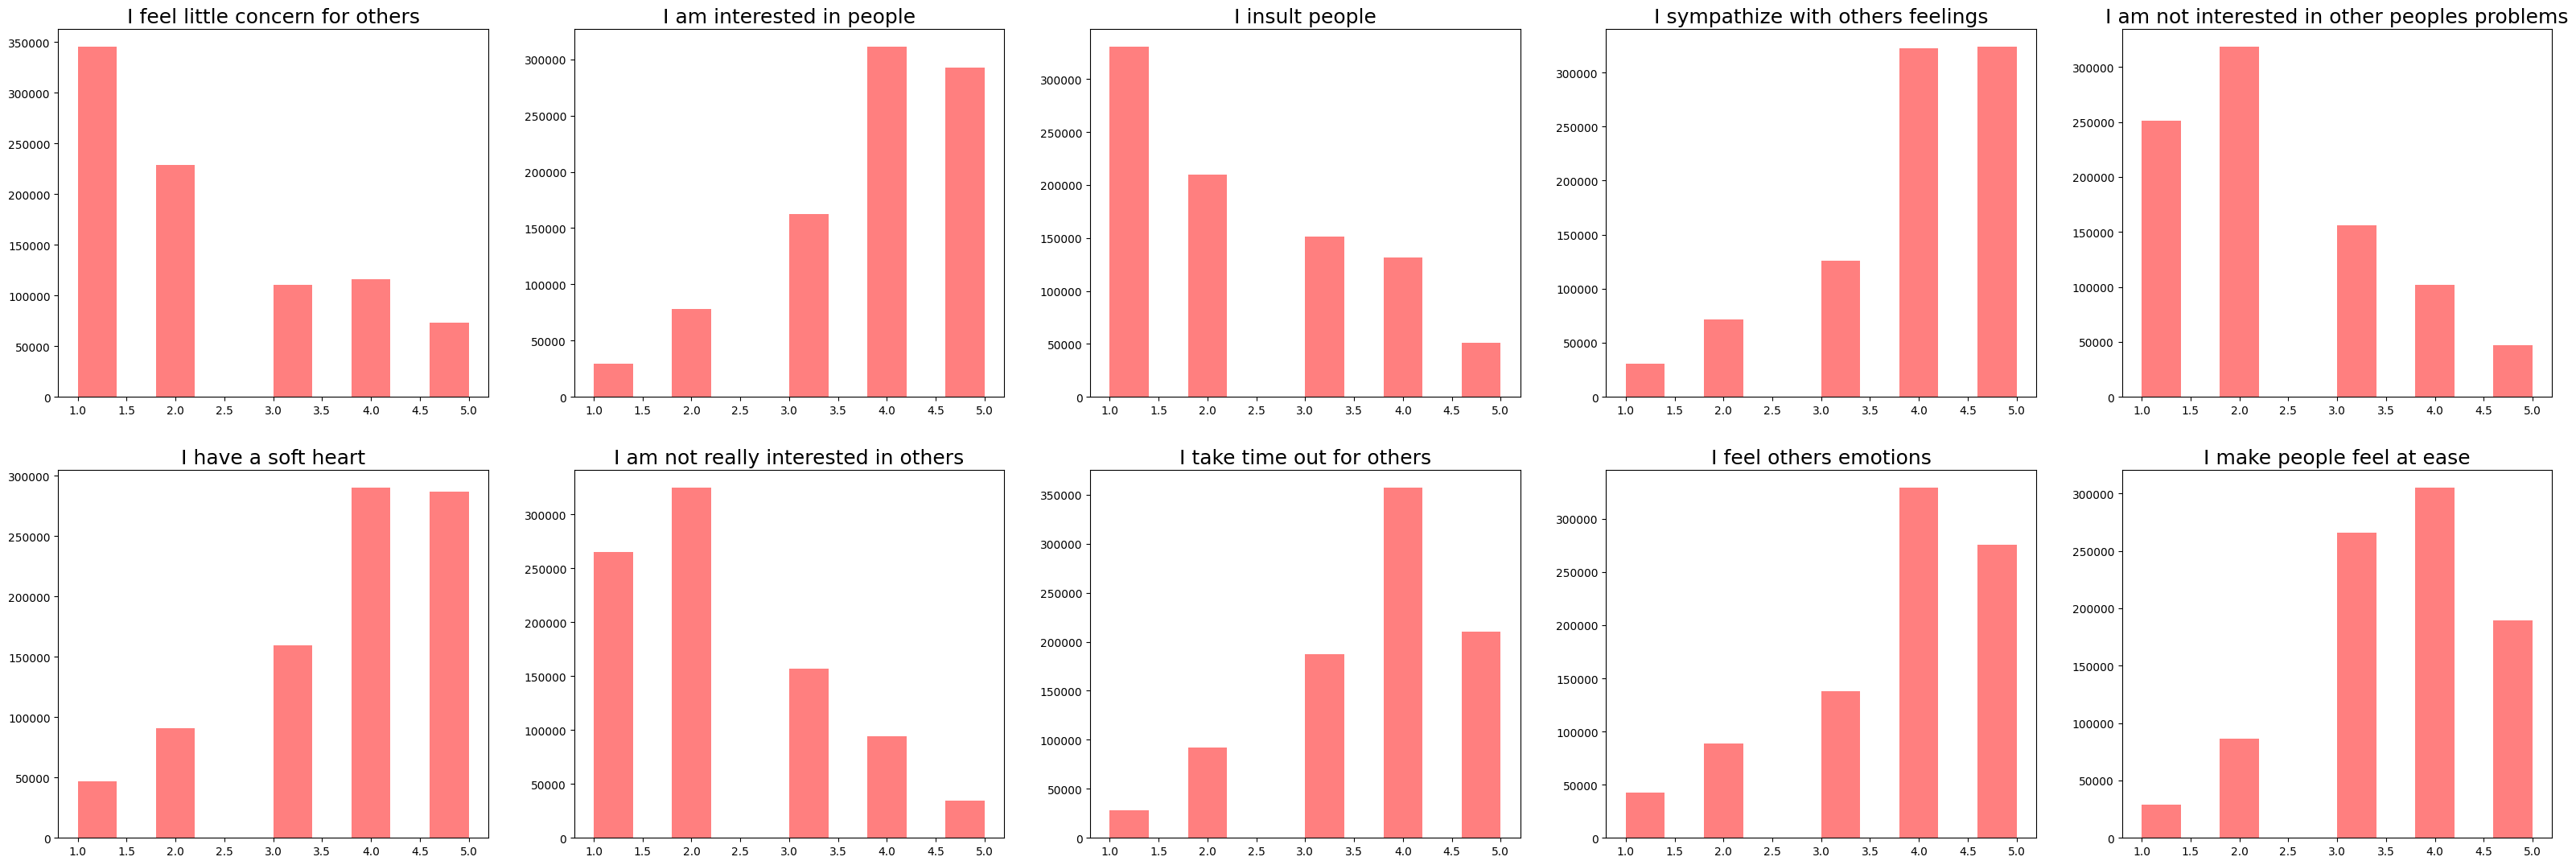

In [15]:
print('Q&As Related to Agreeable Personality')
vis_questions(AGR, agr_questions, 'red')

Q&As Related to Conscientious Personality


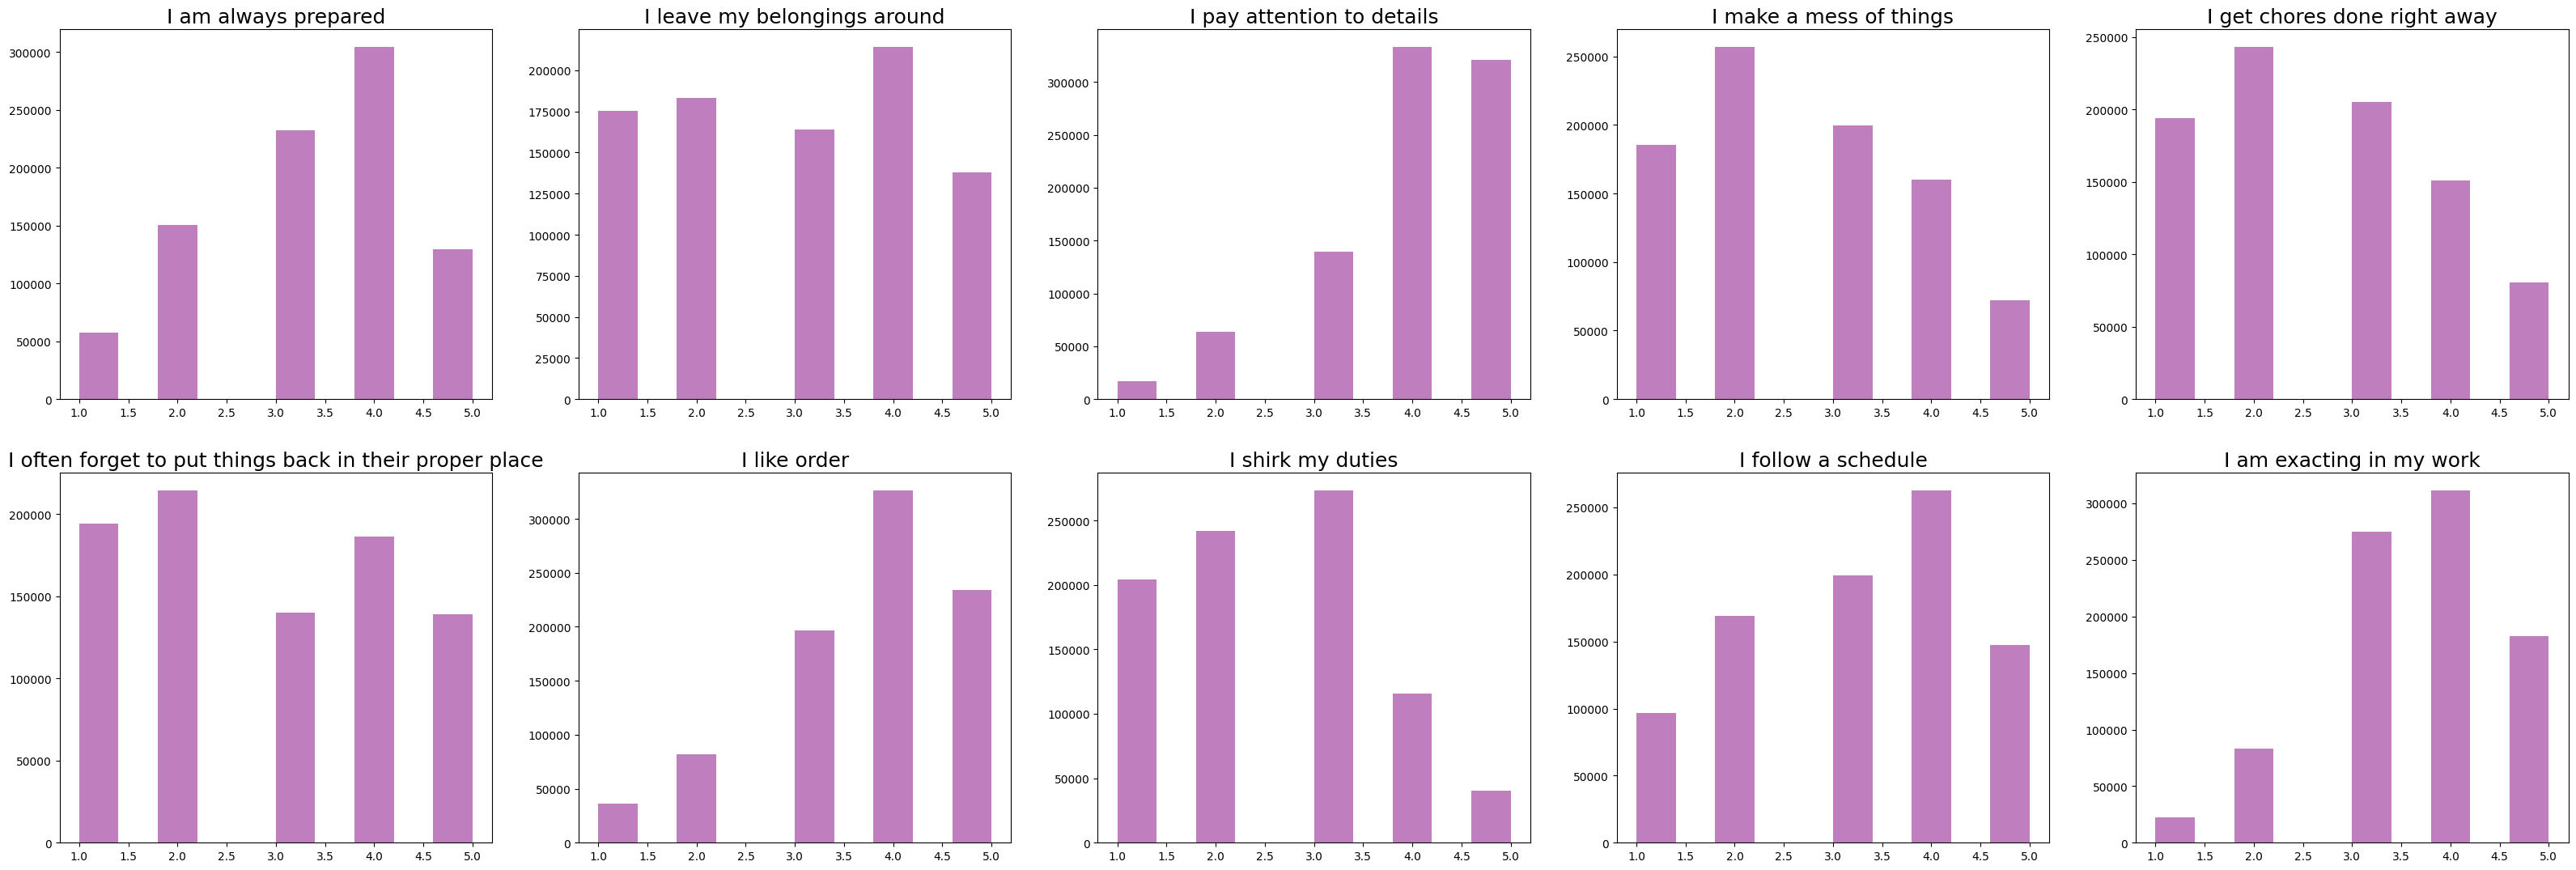

In [16]:
print('Q&As Related to Conscientious Personality')
vis_questions(CSN, csn_questions, 'purple')

Q&As Related to Open Personality


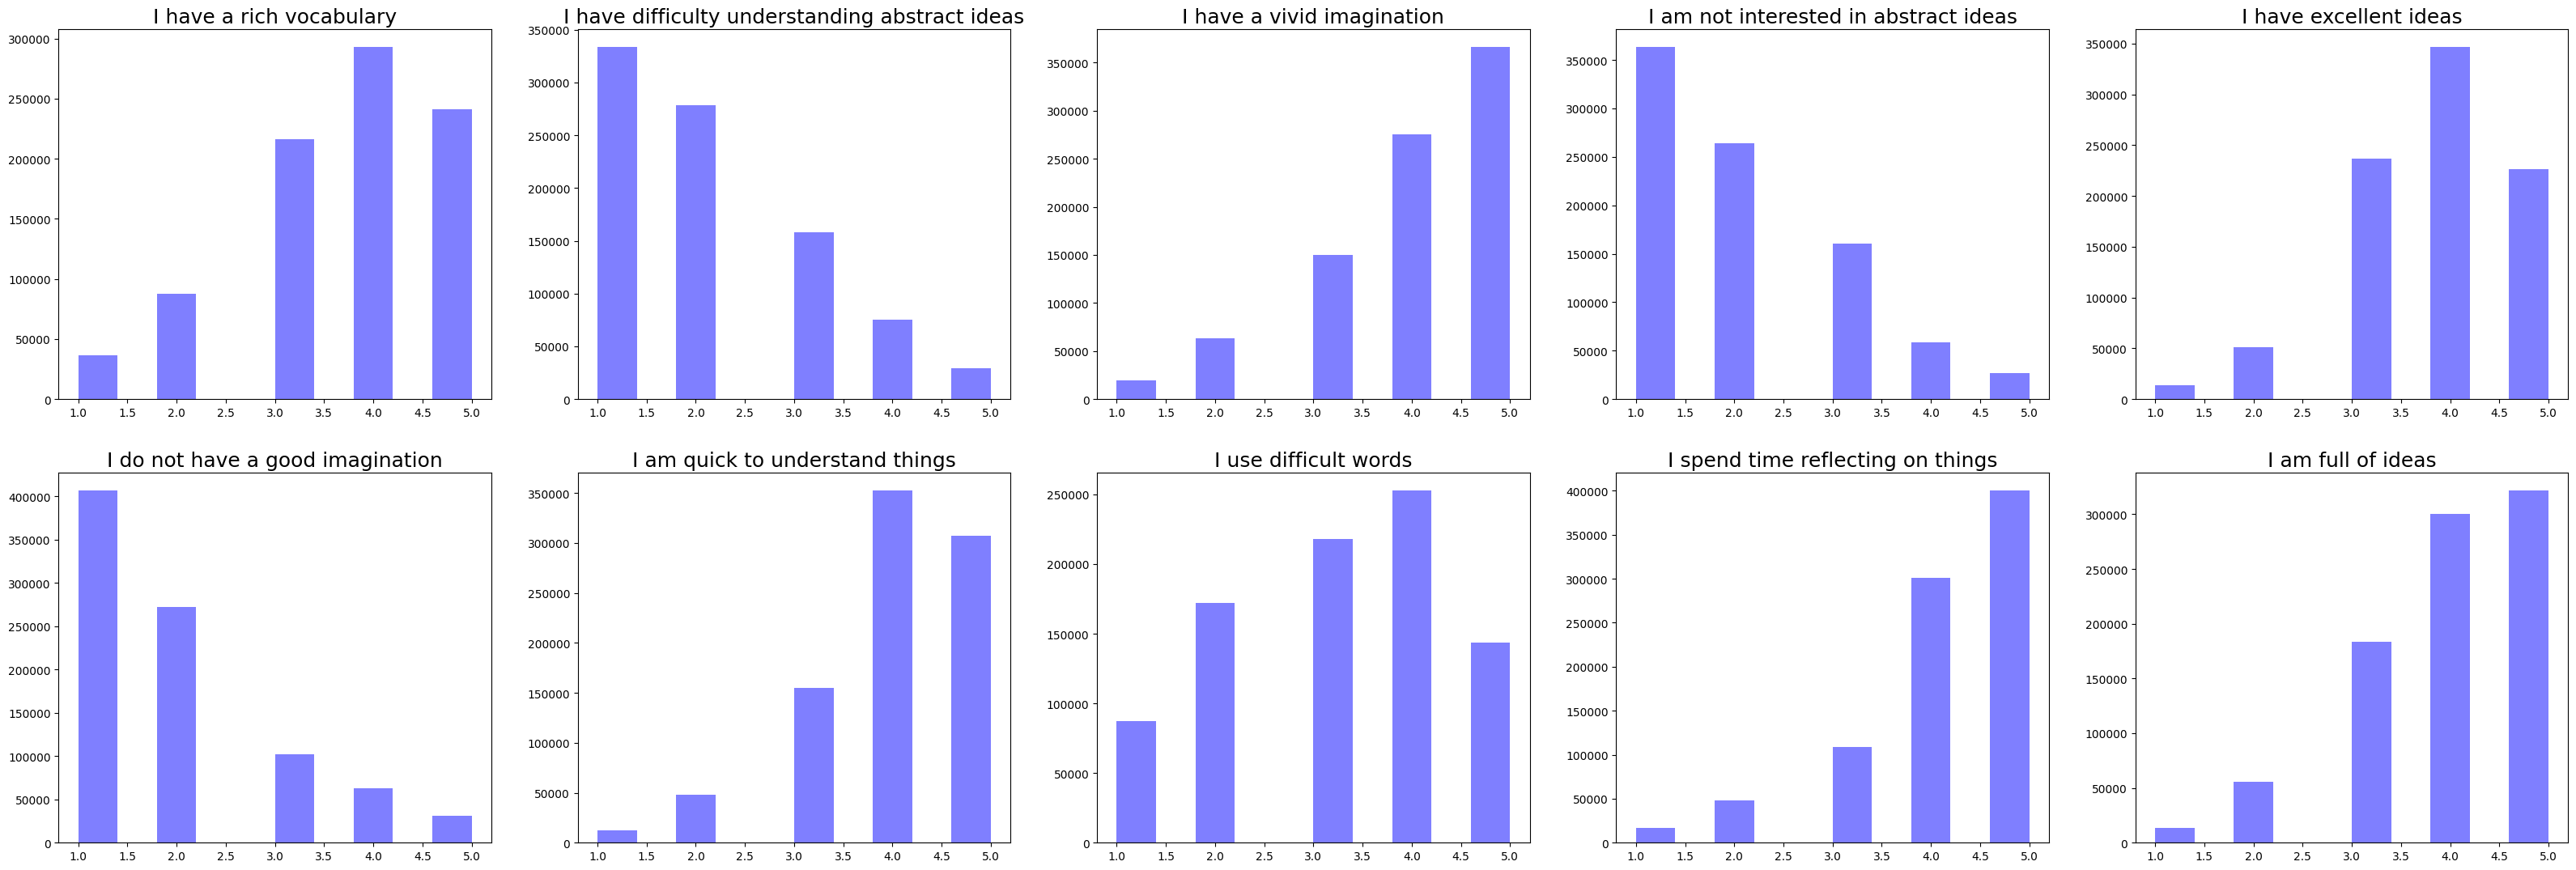

In [17]:
print('Q&As Related to Open Personality')
vis_questions(OPN, opn_questions, 'blue')

### Choose 25 of 50 Question

In [ ]:
# Check Index for Each Column (Question)
columns = data.columns
for idx, column in enumerate(columns):
    print(f"Column index: {idx}, Column name: {column}")

In [ ]:
# Choose Potential Question to Drop
columns_to_drop = [1, 3, 5, 7, 9, 
                   11, 13, 14, 17, 18,
                   20, 21, 22, 24, 26,
                   31, 32, 33, 35, 37, 
                   41, 42, 43, 45, 46,
                   50]

data.drop(data.columns[columns_to_drop], axis = 1, inplace = True)

pd.set_option("display.max_columns", None)

print('Number of participants:', len(data))
data.head()

In [ ]:
sampled_data = data.sample(n=30, random_state=42)
sampled_data

In [ ]:
def sum_columns(dataframe, columns, new_column_name):
    dataframe[new_column_name] = dataframe[columns].sum(axis=1)
    return dataframe

In [ ]:
test_data = sum_columns(sampled_data, sampled_data.columns[0:5], 'sumEXT')
test_data = sum_columns(sampled_data, sampled_data.columns[5:10], 'sumEST')
test_data = sum_columns(sampled_data, sampled_data.columns[10:15], 'sumAGR')
test_data = sum_columns(sampled_data, sampled_data.columns[15:20], 'sumCSN')
test_data = sum_columns(sampled_data, sampled_data.columns[21:25], 'sumOPN')

test_data

In [ ]:
test_data.insert(test_data.columns.get_loc('EXT9') + 1, 'sumEXT', test_data.pop('sumEXT'))
test_data.insert(test_data.columns.get_loc('EST10') + 1, 'sumEST', test_data.pop('sumEST'))
test_data.insert(test_data.columns.get_loc('AGR10') + 1, 'sumAGR', test_data.pop('sumAGR'))
test_data.insert(test_data.columns.get_loc('CSN10') + 1, 'sumCSN', test_data.pop('sumCSN'))
test_data.insert(test_data.columns.get_loc('OPN10') + 1, 'sumOPN', test_data.pop('sumOPN'))

test_data

# Clustering

In [18]:
column_drop = ['country']
drop_ext = ['EXT2', 'EXT4', 'EXT6', 'EXT8', 'EXT10']
drop_est = ['EST2', 'EST4', 'EST5', 'EST8', 'EST9']
drop_arg = ['AGR1', 'AGR2', 'AGR3', 'AGR5', 'AGR7']
drop_csn = ['CSN2', 'CSN3', 'CSN4', 'CSN6', 'CSN8']
drop_opn = ['OPN2', 'OPN3', 'OPN4', 'OPN6', 'OPN7']
column_drop += drop_ext + drop_est + drop_arg + drop_csn + drop_opn

In [19]:
# For ease of calculation lets scale all the values between 0-1 and take a sample of 5000 
from sklearn.preprocessing import MinMaxScaler

df = data.drop(column_drop, axis=1)
columns = list(df.columns)

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)
df = pd.DataFrame(df, columns=columns)
df_sample = df[:5000]

print(columns)

['EXT1', 'EXT3', 'EXT5', 'EXT7', 'EXT9', 'EST1', 'EST3', 'EST6', 'EST7', 'EST10', 'AGR4', 'AGR6', 'AGR8', 'AGR9', 'AGR10', 'CSN1', 'CSN5', 'CSN7', 'CSN9', 'CSN10', 'OPN1', 'OPN5', 'OPN8', 'OPN9', 'OPN10']


c:\Users\ihlas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ihlas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ihlas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ihlas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

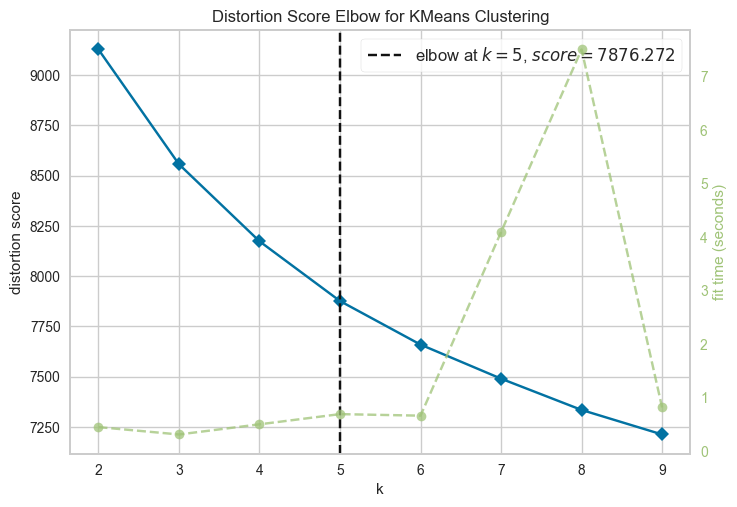

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df_sample)
visualizer.poof()

In [21]:
# Creating K-means Cluster Model
from sklearn.cluster import KMeans

# I use the unscaled data but without the country column
df_model = data.drop(column_drop, axis=1)

# I define 5 clusters and fit my model
kmeans = KMeans(n_clusters=5)
k_fit = kmeans.fit(df_model)

c:\Users\ihlas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [22]:
# Predicting the Clusters
pd.options.display.max_columns = 10
predictions = k_fit.labels_
df_model['Clusters'] = predictions
df_model.head()

,EXT1,EXT3,EXT5,EXT7,EXT9,...,OPN5,OPN8,OPN9,OPN10,Clusters
0,4.0,5.0,5.0,5.0,4.0,...,4.0,3.0,4.0,5.0,2
1,3.0,3.0,3.0,2.0,1.0,...,3.0,2.0,5.0,3.0,0
2,2.0,4.0,3.0,1.0,2.0,...,4.0,3.0,4.0,4.0,0
3,2.0,2.0,4.0,2.0,1.0,...,3.0,4.0,3.0,3.0,3
4,3.0,3.0,5.0,3.0,3.0,...,5.0,3.0,5.0,5.0,2


In [23]:
df_model.Clusters.value_counts()

Clusters
1    191319
2    182812
0    174464
4    173973
3    151798
Name: count, dtype: int64

In [24]:
pd.options.display.max_columns = 150
df_model.groupby('Clusters').mean()

,EXT1,EXT3,EXT5,EXT7,EXT9,EST1,EST3,EST6,EST7,EST10,AGR4,AGR6,AGR8,AGR9,AGR10,CSN1,CSN5,CSN7,CSN9,CSN10,OPN1,OPN5,OPN8,OPN9,OPN10
Clusters,,,,,,,,,,,,,,,,,,,,,,,,,
0,2.124685,3.158973,3.030534,2.174076,2.306161,3.563692,4.183986,2.846152,2.856721,2.573035,4.359839,4.212009,4.002562,4.186228,3.741058,3.912125,3.370575,4.205372,4.006534,3.904599,3.410102,3.670499,2.803169,4.189833,3.718910
1,3.506829,3.816741,4.070056,3.770985,3.791390,3.976688,4.363958,3.585357,3.866354,3.281943,4.286516,4.136719,3.986327,4.236181,3.944825,3.080593,2.343233,3.579556,3.047418,3.566023,3.800464,3.988501,3.416205,4.273141,4.217307
2,3.530950,4.344742,4.260328,3.949177,3.791447,2.195190,3.049242,1.854260,2.115594,1.692214,4.203056,3.821259,4.079180,4.065772,4.205030,3.698997,3.087795,3.822244,3.541972,3.860173,3.873564,4.166947,3.235592,4.064651,4.288723
3,2.167426,2.832481,2.678915,2.135917,2.754753,2.404920,3.093710,2.089731,2.448596,2.381896,2.847936,2.654126,2.946962,2.627887,3.034651,3.210886,2.330360,3.479058,2.774608,3.471600,3.808192,3.823133,3.398819,3.928892,3.889491
4,1.708392,2.178200,2.243762,1.633690,2.105062,4.285435,4.539515,3.836480,3.918160,4.002092,3.899479,3.885017,3.440597,3.716669,3.024527,2.794359,2.003857,3.556241,2.685796,3.308352,3.618590,3.438884,3.256551,4.341323,3.755186


In [57]:
# Average Each Personality. Each personality have 5 question
def avg_each_question(column_name, df_model, column_list):
    avg_data = pd.DataFrame()
    for i in range(0, 21, 5):
        avg_data[column_name[int(i/5)]] = df_model[column_list[i:i+5]].sum(axis=1)/5
        
    return avg_data

In [76]:
column_list = list(df_model)
column_name = ['Extroversion', 'Neurotic', 'Agreeable', 'Conscientious', 'Open']

result_avg = avg_each_question(column_name, df_model, column_list)
result_avg['clusters'] = df_model[list(df_model)[-1:]]
# result_avg.groupby('clusters').mean()
result_avg

,Extroversion,Neurotic,Agreeable,Conscientious,Open,clusters
0,4.6,2.2,3.6,3.4,4.2,2
1,2.4,2.0,4.4,3.4,2.8,0
2,2.4,3.0,3.8,3.4,4.0,0
3,2.2,2.6,3.8,2.0,3.4,3
4,3.4,2.0,4.2,4.6,4.6,2
...,...,...,...,...,...,...
874361,3.6,3.4,4.2,3.2,2.8,1
874362,3.6,4.6,4.0,2.6,4.4,1
874363,4.2,2.8,3.6,2.2,4.6,1
874364,2.0,3.6,3.8,3.6,4.2,4


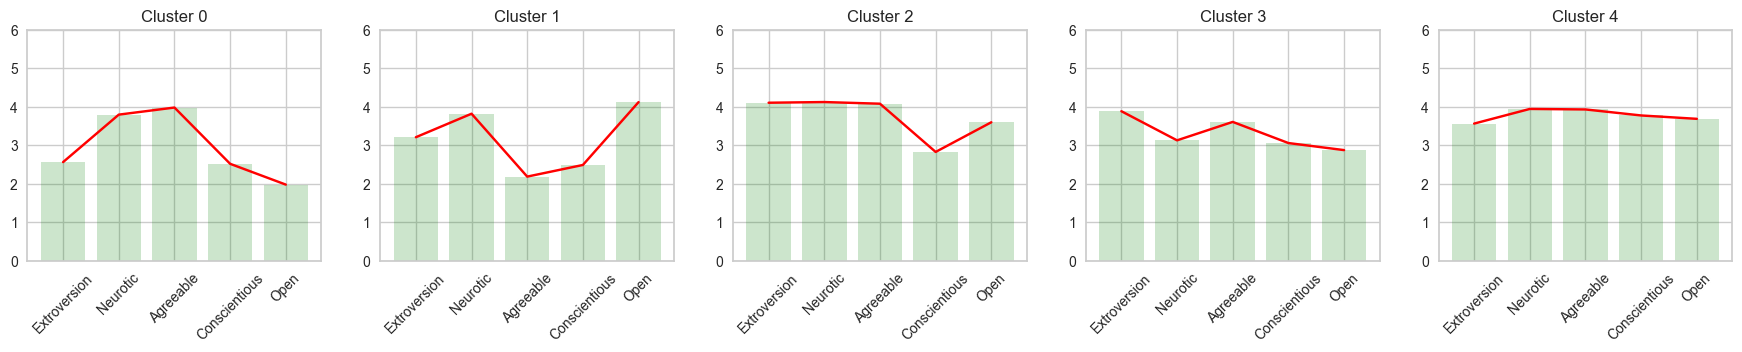

In [72]:
# Visualizing the means for each cluster
dataclusters = result_avg.groupby('clusters').mean()
plt.figure(figsize=(22,3))
for i in range(0, 5):
    plt.subplot(1,5,i+1)
    plt.bar(dataclusters.columns, dataclusters.iloc[:, i], color='green', alpha=0.2)
    plt.plot(dataclusters.columns, dataclusters.iloc[:, i], color='red')
    plt.title('Cluster ' + str(i))
    plt.xticks(rotation=45)
    plt.ylim(0,6);

In [78]:
# In order to visualize in 2D graph I will use PCA
from sklearn.decomposition import PCA

result_avg = result_avg.drop(['clusters'], axis=1)

pca = PCA(n_components=2)
pca_fit = pca.fit_transform(result_avg)

df_pca = pd.DataFrame(data=pca_fit, columns=['PCA1', 'PCA2'])
df_pca['Clusters'] = predictions
df_pca

,PCA1,PCA2,Clusters
0,-1.766688,0.348208,2
1,-0.188087,0.855609,0
2,0.317695,0.280415,0
3,0.658049,0.768234,3
4,-1.419107,0.446900,2
...,...,...,...
874361,-0.309497,-0.477929,1
874362,0.263978,-1.438107,1
874363,-0.945618,0.007763,1
874364,0.861010,-0.099271,4


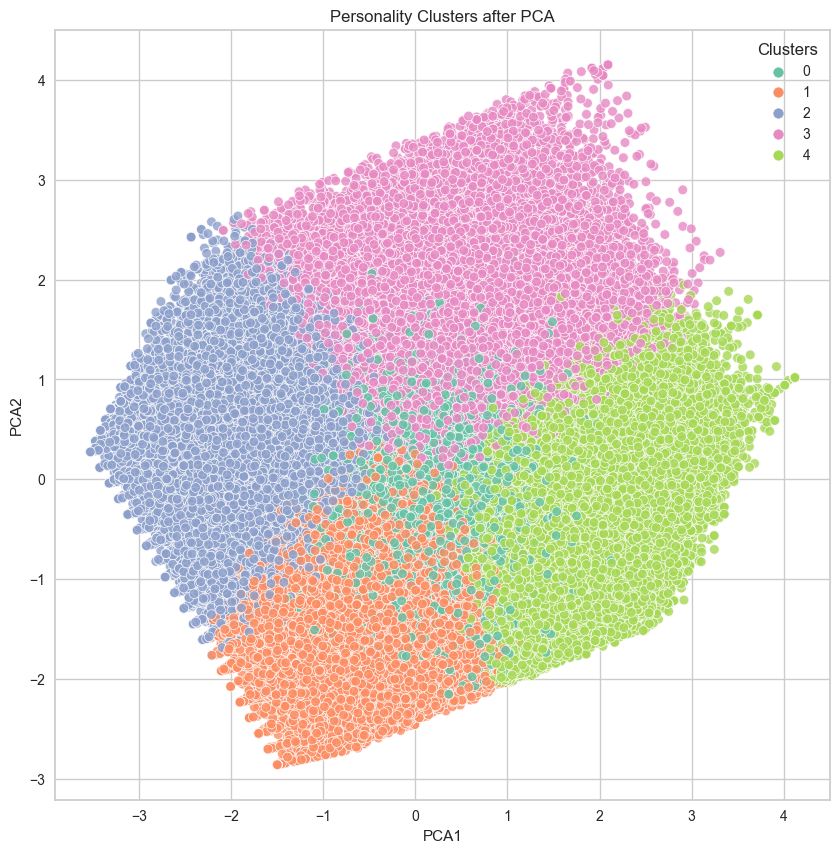

In [79]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='Clusters', palette='Set2', alpha=0.8)
plt.title('Personality Clusters after PCA');

In [81]:
# my_data = [2,3,3,2,2,5,2,4,5,4,2,3,4,5,2,2,1,1,3,1,2,5,1,5,2]
# my_data = [5,1,3,5,5,5,1,4,1,4,1,5,2,5,5,3,2,4,2,5,1,5,2,5,5]
my_data = [5,2,4,5,4,2,1,1,3,1,5,1,3,5,5,1,5,2,5,5,1,5,2,5,5]
my_data = np.array(my_data).reshape(1, -1)

In [82]:
my_personality = k_fit.predict(my_data)
print('My Personality Cluster: ', my_personality)

My Personality Cluster:  [2]


c:\Users\ihlas\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
